## Paris-Olympics - 2024

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
athletes_data = pd.read_csv("/Users/ashmitharoopkumar/Desktop/paris-github/Data_visualization/Files/Cleaned/athlete_data.csv")
events_data = pd.read_csv("/Users/ashmitharoopkumar/Desktop/paris-github/Data_visualization/Files/Cleaned/events.csv")
teams_data = pd.read_csv("/Users/ashmitharoopkumar/Desktop/paris-github/Data_visualization/Files/Cleaned/cleaned_teams.csv")
medals_data = pd.read_csv("/Users/ashmitharoopkumar/Desktop/paris-github/Data_visualization/Files/Cleaned/medals_data.csv")
medals_total = pd.read_csv("/Users/ashmitharoopkumar/Desktop/paris-github/Data_visualization/Files/Cleaned/medals_total.csv")
medallist_data = pd.read_csv("/Users/ashmitharoopkumar/Desktop/paris-github/Data_visualization/Files/Cleaned/medallists_data.csv")
countries_flags_data = pd.read_csv("/Users/ashmitharoopkumar/Desktop/paris-github/Data_visualization/Files/Cleaned/countries_with_flags.csv")


## Gender Proportion in Olympics 2024

In [115]:
athletes_data.head()

,Code,Current,Name,Gender,Function,Country Code,Country,Nationality,Height,Discipline,Events,Birth Date,Age
0,1532872,True,Aleksanyan Artur,Male,Athlete,ARM,Armenia,Armenia,0.0,Wrestling,Mens Greco-Roman 97kg,1991-10-21,33
1,1532873,True,Amoyan Malkhas,Male,Athlete,ARM,Armenia,Armenia,0.0,Wrestling,Mens Greco-Roman 77kg,1999-01-22,26
2,1532874,True,Galstyan Slavik,Male,Athlete,ARM,Armenia,Armenia,0.0,Wrestling,Mens Greco-Roman 67kg,1996-12-21,28
3,1532944,True,Harutyunyan Arsen,Male,Athlete,ARM,Armenia,Armenia,0.0,Wrestling,Mens Freestyle 57kg,1999-11-22,25
4,1532945,True,Tevanyan Vazgen,Male,Athlete,ARM,Armenia,Armenia,0.0,Wrestling,Mens Freestyle 65kg,1999-10-27,25


In [113]:
athletes_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

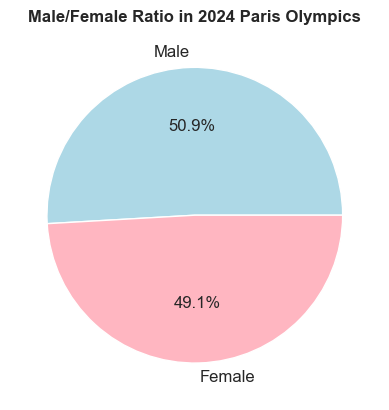

In [117]:
plt.pie(
    athletes_data['Gender'].value_counts(),
    labels=['Male', 'Female'],
    autopct='%1.1f%%',
    colors=['#ADD8E6', '#FFB6C1'], 
    textprops={'fontsize': 12}
)
plt.title("Male/Female Ratio in 2024 Paris Olympics", fontweight='bold')
plt.show()


## Age Analysis by Athletes

In [26]:
from datetime import datetime
athletes_data['Birth Date'] = pd.to_datetime(athletes_data['Birth Date'])
athletes_data['Age'] = athletes_data['Birth Date'].apply(lambda birth_date: (datetime.now() - birth_date).days // 365)

In [30]:
athletes_data['Age'].describe()

count    11113.000000
mean        27.287501
std          5.419185
min         12.000000
25%         24.000000
50%         27.000000
75%         30.000000
max         70.000000
Name: Age, dtype: float64

## Youngest and Oldest Athlete

In [32]:
youngest_athlete = athletes_data.loc[athletes_data['Age'].idxmin()]
oldest_athlete = athletes_data.loc[athletes_data['Age'].idxmax()]
print(f" Youngest athlete of this olympics is: {youngest_athlete['Name']} and age of athlete is {youngest_athlete['Age']}")
print(f" oldest athlete of this olympics is: {oldest_athlete['Name']} and age of athlete is {oldest_athlete['Age']}")

 Youngest athlete of this olympics is: Zheng Haohao and age of athlete is 12
 oldest athlete of this olympics is: Hanna Mary and age of athlete is 70


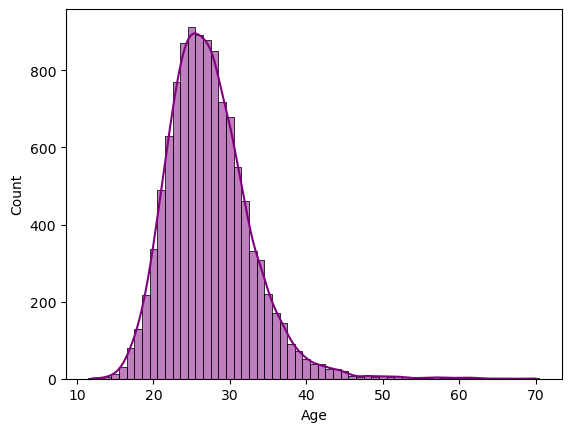

In [44]:
bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']

sns.histplot(
    data=athletes_data,
    x='Age',
    bins=bins,
    discrete=True,
    kde=True,
    color='purple' 
)
plt.show()

#### Youngest - Zheng Haohao (Age - 12)
#### Oldest   - Hanna Mary (Age - 70)

## Scatterplot to show Age distribution by Gender.

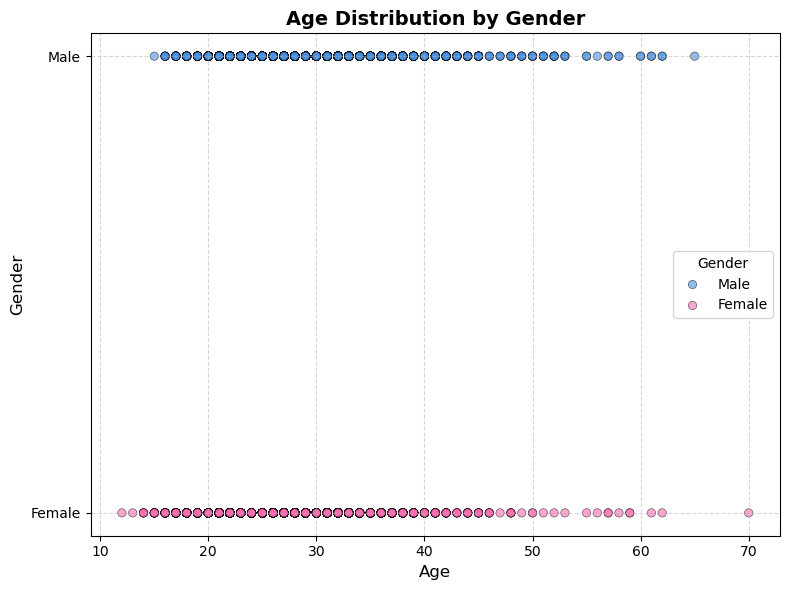

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=athletes_data,
    x='Age',
    y='Gender',
    hue='Gender',
    palette={'Male': '#4A90E2', 'Female': '#FF69B4'},
    alpha=0.6,
    edgecolor='black'
)
plt.title('Age Distribution by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Athlete Representation by Country

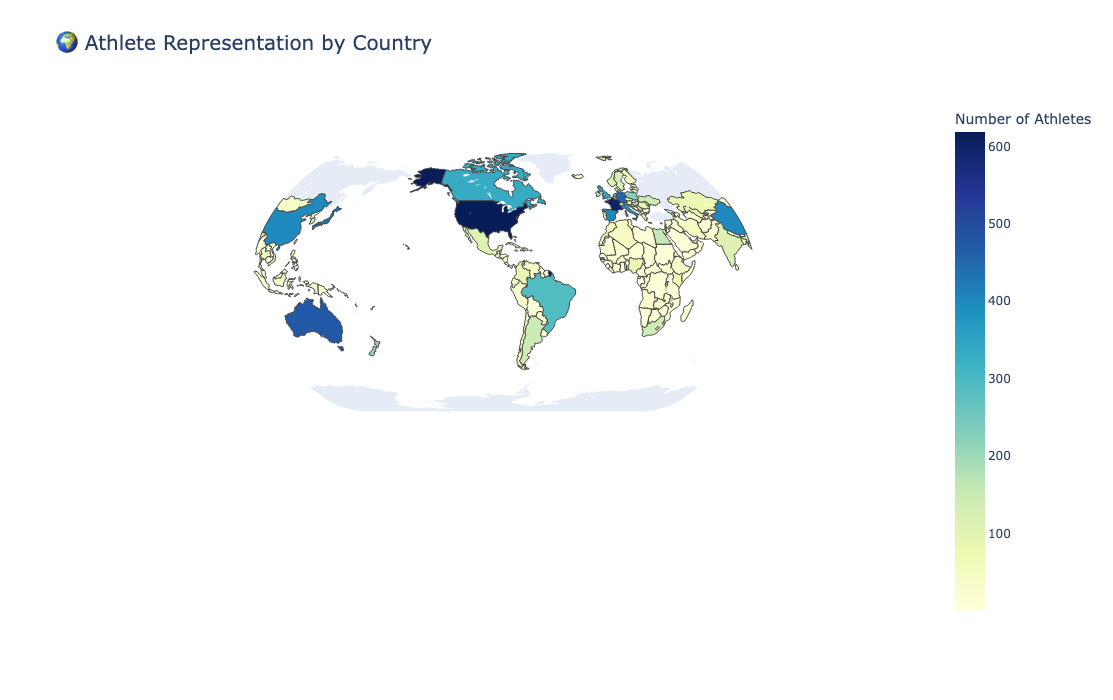

In [95]:
import plotly.express as px

# Group data
country_counts = athletes_data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Athlete Count']

# Enhanced choropleth
fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Athlete Count',
    hover_name='Country',
    color_continuous_scale='YlGnBu',
    title='🌍 Athlete Representation by Country', ## Unicode \U0001F30D
)

# Layout
fig.update_layout(
    width=1200,
    height=700,
    geo=dict(showframe=False, showcoastlines=False, projection_type='natural earth'),
    title_font_size=20,
    coloraxis_colorbar=dict(title='Number of Athletes')
)

fig.show()

## Box plot for Athlete Age distribution and outliers

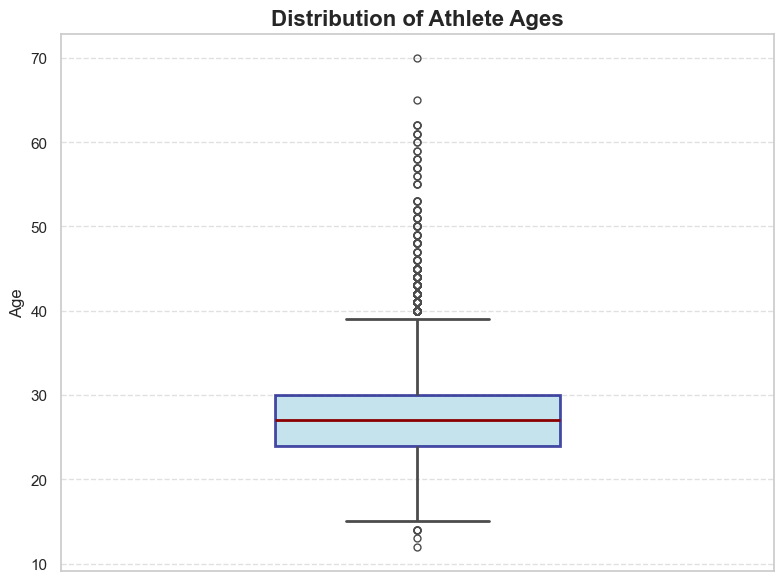

In [81]:
athletes_data = athletes_data[(athletes_data['Age'] > 10) & (athletes_data['Age'] < 100)]  # Filter for realistic age range

# Enhanced boxplot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.boxplot(data=athletes_data, y='Age', color='#4c72b0', width=0.4, linewidth=2, fliersize=5,
            boxprops=dict(facecolor='lightblue', edgecolor='navy', linewidth=2, alpha=0.7),
            medianprops=dict(color='darkred', linewidth=2))
plt.title('Distribution of Athlete Ages', fontsize=16, weight='bold')
plt.ylabel('Age', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Avg age of female and male athletes

In [93]:
avg_male_age = int(athletes_data[athletes_data['Gender']=='Male']['Age'].mean())
avg_female_age = int(athletes_data[athletes_data['Gender']=='Female']['Age'].mean())
print(f"Avg male age is: {avg_male_age} and Avg female age is: {avg_female_age}")

Avg male age is: 27 and Avg female age is: 26


## Top 10 countries with highest no of athletes

In [8]:
top =athletes_data['Country'].value_counts().head(10).index
top_10 = athletes_data[athletes_data['Country'].isin(top)]

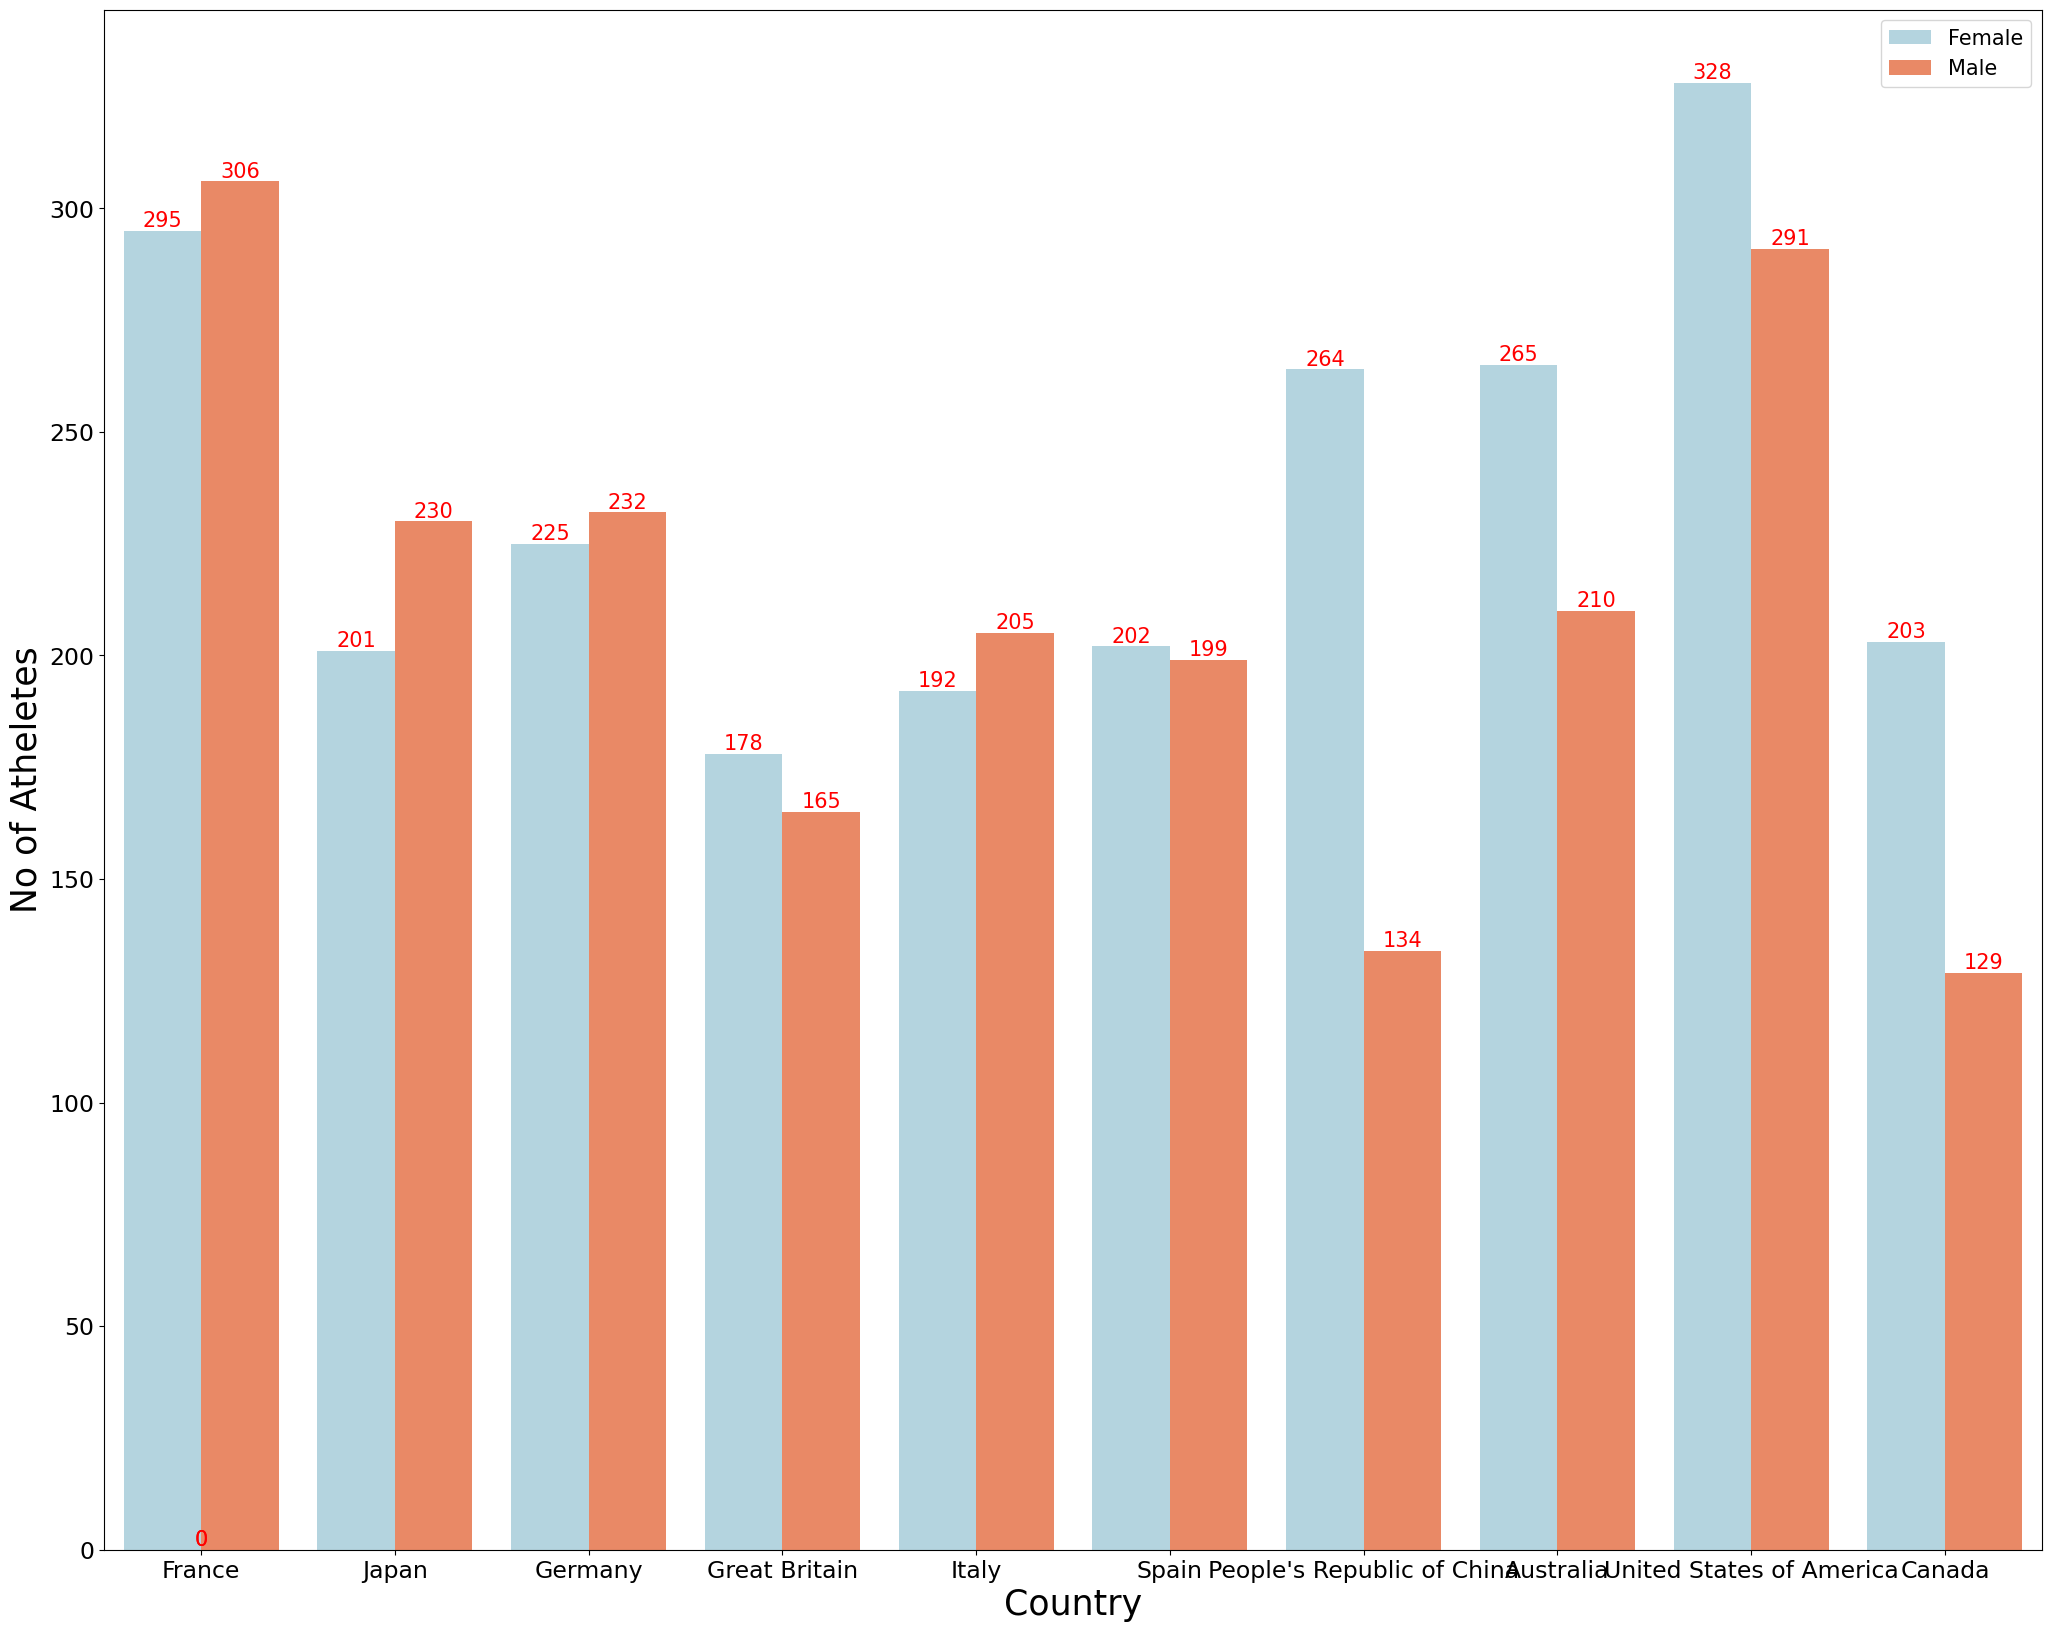

In [12]:
plt.figure(figsize=(25,20))
ax = sns.countplot(data = top_10,x='Country',hue='Gender',palette=['lightblue', 'coral'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=15,color='red')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Country',fontsize=25)
plt.ylabel('No of Atheletes',fontsize=25)
plt.legend(fontsize=15, title_fontsize='14')
plt.show()

## Top 8 games with highest no of participant

In [15]:
top_games = athletes_data['Discipline'].value_counts().head(8).index
top_8_games = athletes_data[athletes_data['Discipline'].isin(top_games)]

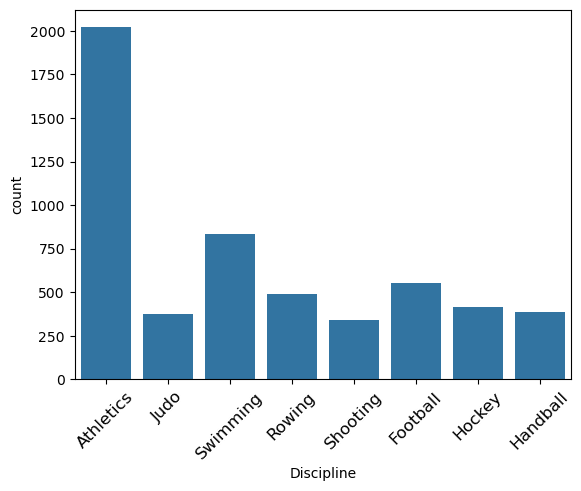

In [17]:
sns.countplot(top_8_games,x='Discipline')
plt.xticks(rotation=45, fontsize=12)
plt.show()

## Top 8 games with lowest no of participant

In [22]:
bot_games = athletes_data['Discipline'].value_counts().tail(8).index
bot_8_games = athletes_data[athletes_data['Discipline'].isin(bot_games)]

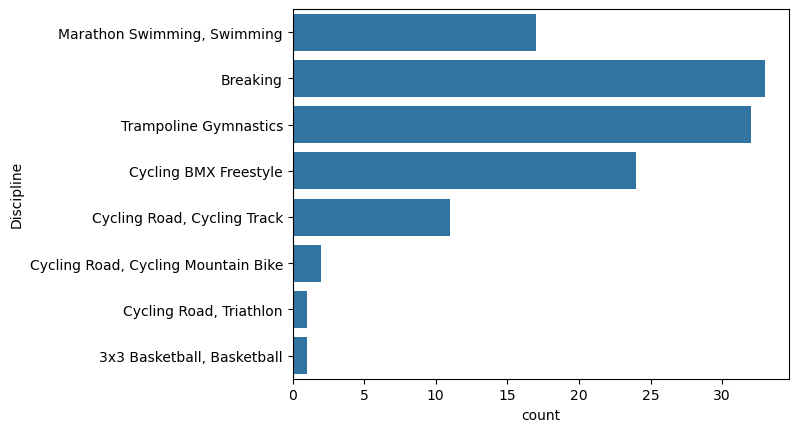

In [24]:
sns.countplot(bot_8_games,y='Discipline')
plt.show()

## Top 10 countries with lowest no of athletes

In [27]:
bot =athletes_data['Country'].value_counts().tail(10).index
bot_10 = athletes_data[athletes_data['Country'].isin(bot)]

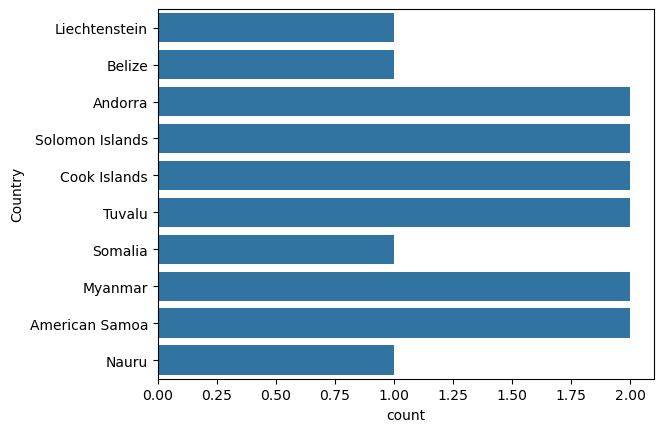

In [29]:
sns.countplot(data = bot_10,y='Country')
plt.show()

## Total medals by country

In [37]:
import plotly.express as px
fig = px.bar(medals_total, x='country', y='Total', title='Total Medals by Country')
fig.show(renderer='iframe')

## Medals by event and discipline

In [48]:
fig = px.histogram(medals_data,x='discipline',color='event',title='Count of medals by events and disciplines')
fig.update_layout(barmode='stack')
fig.show(renderer='iframe')

In [51]:
fig = px.histogram(medals_data,x='discipline',color='country',title='Count of medals by event')
fig.update_layout(barmode='stack')
fig.show(renderer='iframe')

## Medal dates

In [53]:
medals_data['medal_date'].value_counts()

medal_date
2024-08-10    117
2024-08-09    108
2024-08-03     90
2024-08-08     86
2024-08-02     72
2024-08-04     71
2024-08-07     70
2024-08-05     60
2024-07-29     59
2024-07-31     56
2024-08-01     50
2024-08-06     47
2024-07-27     41
2024-07-28     41
2024-08-11     41
2024-07-30     35
Name: count, dtype: int64

In [56]:
events_data.sport.value_counts()

sport
Athletics                48
Swimming                 35
Wrestling                18
Judo                     15
Shooting                 15
Rowing                   14
Artistic Gymnastics      14
Boxing                   13
Fencing                  12
Cycling Track            12
Canoe Sprint             10
Sailing                  10
Weightlifting            10
Taekwondo                 8
Diving                    8
Canoe Slalom              6
Equestrian                6
Table Tennis              5
Tennis                    5
Archery                   5
Badminton                 5
Skateboarding             4
Sport Climbing            4
Cycling Road              4
Triathlon                 3
Artistic Swimming         2
Water Polo                2
Volleyball                2
Trampoline Gymnastics     2
Basketball                2
3x3 Basketball            2
Beach Volleyball          2
Surfing                   2
Football                  2
Golf                      2
Breaking      